In [2]:
%load_ext autoreload
%autoreload 2
#Add own modules to path
import sys
sys.path.append('../..')
sys.path.append('../../src/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.visualization.visualize import plot_confusion_matrix
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')

data = load_breast_cancer()
X = data.data
z = data.target

X_train,X_test,z_train,z_test = train_test_split(X,z,test_size=0.2)
X_scl = StandardScaler().fit(X_train)
X_train = X_scl.transform(X_train)
X_test = X_scl.transform(X_test)

Train accuracy:  0.9824175824175824
Test accuracy:  0.9912280701754386


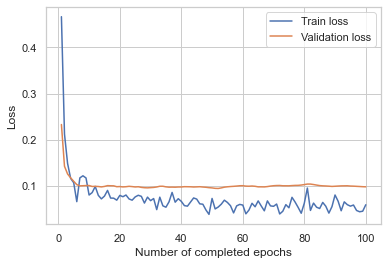

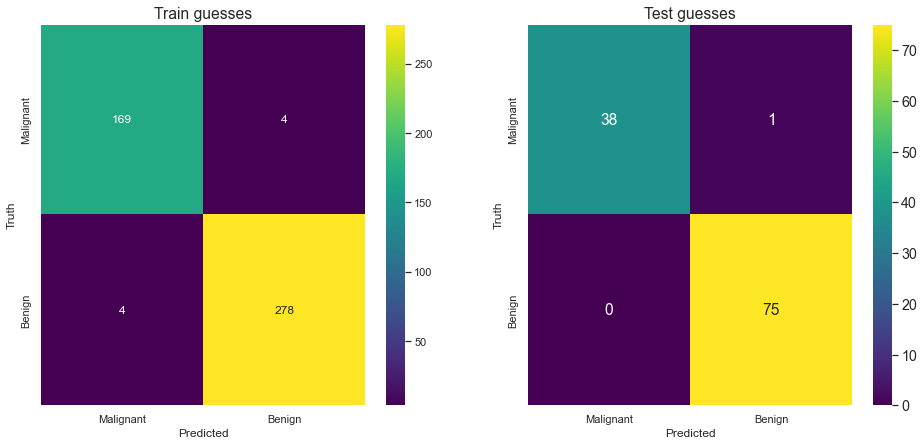

In [66]:
from src.modelling.logreg import SGD_logreg
sns.set_theme(style='whitegrid')
#Model parameters
lmb = 0.001
momentum = 0.9
schedule = 'constant'
lr0 = 0.01
batch_size=32
n_epochs=100

logreg = SGD_logreg(lmb = lmb,
                   momentum = momentum,
                   schedule = schedule,
                   lr0=lr0,
                   batch_size=batch_size,
                   n_epochs=n_epochs,
                   val_fraction=0.1)

logreg.fit(X_train,z_train)
logreg.plot_loss()


print("Train accuracy: ",logreg.score(X_train,z_train))
print("Test accuracy: ",logreg.score(X_test,z_test))

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,7))
ax1 = plot_confusion_matrix(z_train,logreg.predict(X_train),ax=ax1,title = 'Train guesses')
ax2 = plot_confusion_matrix(z_test,logreg.predict(X_test),ax=ax2, title = 'Test guesses')

The logistic regressor is very quickly able to reach a good score, with only one mistake on the test set. Again note that crossvalidation should be employed for bench-marking.
### Higher epochs

Train accuracy:  0.9868131868131869
Test accuracy:  0.9824561403508771


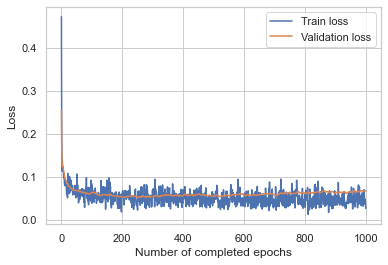

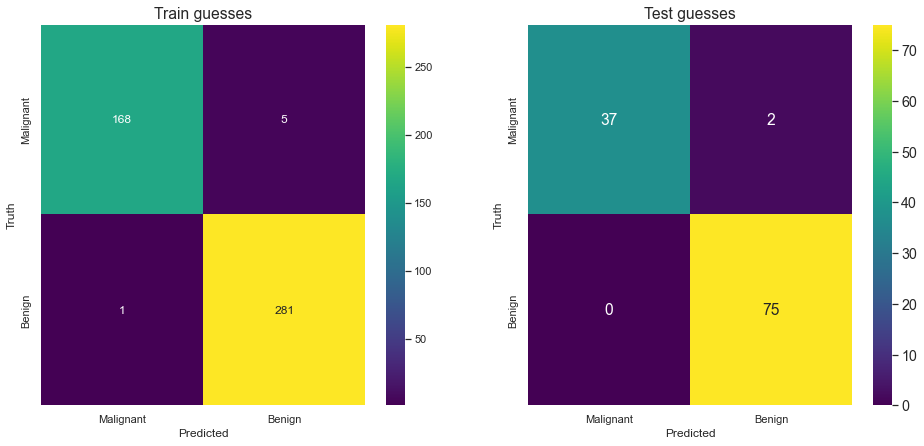

In [67]:
sns.set_theme(style='whitegrid')
#Model parameters
lmb = 0.001
momentum = 0.9
schedule = 'constant'
lr0 = 0.01
batch_size=32
n_epochs=1000

logreg = SGD_logreg(lmb = lmb,
                   momentum = momentum,
                   schedule = schedule,
                   lr0=lr0,
                   batch_size=batch_size,
                   n_epochs=n_epochs,
                   val_fraction=0.1)

logreg.fit(X_train,z_train)
logreg.plot_loss()


print("Train accuracy: ",logreg.score(X_train,z_train))
print("Test accuracy: ",logreg.score(X_test,z_test))

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,7))
ax1 = plot_confusion_matrix(z_train,logreg.predict(X_train),ax=ax1,title = 'Train guesses')
ax2 = plot_confusion_matrix(z_test,logreg.predict(X_test),ax=ax2, title = 'Test guesses')

It can be seen that increasing number of epochs beyond 200-400 is somewhat redundant. n_epochs =100 is used going forward.
#### Gridsearching lambda vs learning rate

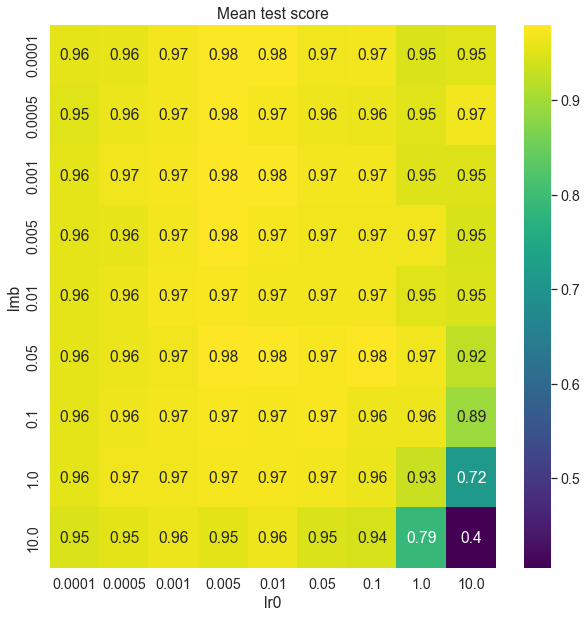

lmb                0.00100
lr0                0.00500
mean_test_score    0.98022
rank_test_score          1
Name: 21, dtype: object


In [68]:
from src.model_evaluation.param_analysis import grid_search_df
from src.visualization.visualize import plot_grid_search

lambdas = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,10]
lrs = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,10]

#Model parameters
lmb = 0.001
momentum = 0.9
schedule = 'constant'
lr0 = 0.01
batch_size=32
n_epochs=100

logreg = logreg.set_params(lmb = lmb,
                           momentum = momentum,
                           schedule = schedule,
                           lr0=lr0,
                           batch_size=batch_size,
                           n_epochs=n_epochs,
                           val_fraction=0.1)

best_model, scores = grid_search_df(X_train,z_train,logreg, param_grid=dict(lmb=lambdas,lr0=lrs))
plot_grid_search(scores,('lmb','lr0'))
print(scores.loc[scores['rank_test_score'].idxmin()])

Similarily as with neural network, a learning rate of 10 still yields relatively good results. Note that with too high regularization the score is decreased with lr 1 and 10. Note that most of the learning rates tested here also achieves high results. This may simply indicate that the problem is rather simple, and one could almost predict based on some simple rules engine, with certain thresholds.

Train accuracy:  0.8681318681318682
Test accuracy:  0.868421052631579


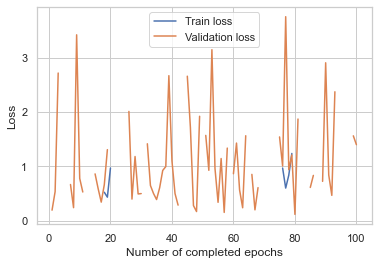

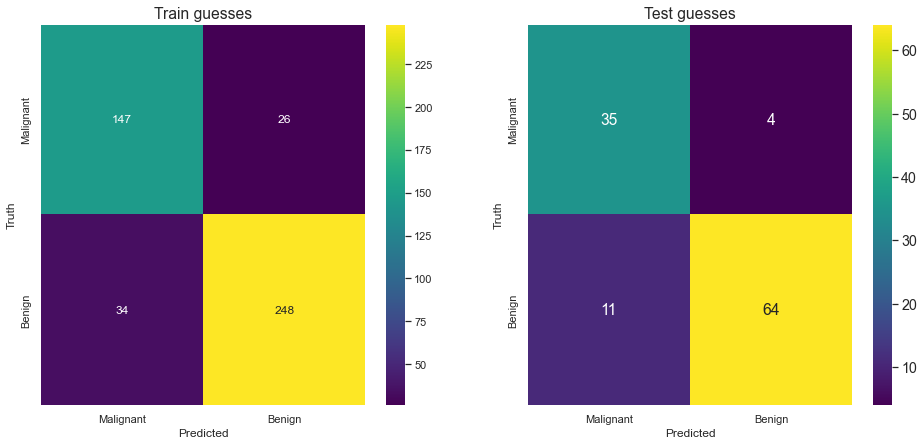

In [73]:
sns.set_theme(style='whitegrid')
#Model parameters
lmb = 0.1
momentum = 0.9
schedule = 'constant'
lr0 = 10
batch_size=32
n_epochs=100

logreg = SGD_logreg(lmb = lmb,
                   momentum = momentum,
                   schedule = schedule,
                   lr0=lr0,
                   batch_size=batch_size,
                   n_epochs=n_epochs,
                   val_fraction=0.1)

logreg.fit(X_train,z_train)
logreg.plot_loss()


print("Train accuracy: ",logreg.score(X_train,z_train))
print("Test accuracy: ",logreg.score(X_test,z_test))

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,7))
ax1 = plot_confusion_matrix(z_train,logreg.predict(X_train),ax=ax1,title = 'Train guesses')
ax2 = plot_confusion_matrix(z_test,logreg.predict(X_test),ax=ax2, title = 'Test guesses')

In [81]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from src.model_evaluation.resampling import cross_val_score

#Model parameters
lmb = 0.001
momentum = 0.9
schedule = 'constant'
lr0 = 0.005
batch_size=32
n_epochs=10500

logreg = logreg.set_params(lmb = lmb,
                           momentum = momentum,
                           schedule = schedule,
                           lr0=lr0,
                           batch_size=batch_size,
                           n_epochs=n_epochs,
                           val_fraction=0.1)

logreg_sk = SGDClassifier(fit_intercept=False,
                          loss='log',
                          max_iter=100,
                          tol=0,
                          alpha = lmb,
                          learning_rate='constant',
                          eta0=lr0)

logreg_sk2 = LogisticRegression(fit_intercept=False,
                          max_iter=100,
                          tol=0)


logreg_scores =  cross_val_score(logreg,X,z,5,X_scl,metrics=['accuracy'])
logreg_sk_scores =  cross_val_score(logreg_sk,X,z,5,X_scl,metrics=['accuracy'])
logreg_sk2_scores =  cross_val_score(logreg_sk2,X,z,5,X_scl,metrics=['accuracy'])
print('CV results:\n')
print('LogReg accuracy[train,test]:',(logreg_scores['train']['accuracy'], logreg_scores['test']['accuracy']))
print('SGDClassifier accuracy[train,test]:',(logreg_sk_scores['train']['accuracy'], logreg_sk_scores['test']['accuracy']))
print('LogisticRegression accuracy[train,test]:',(logreg_sk2_scores['train']['accuracy'], logreg_sk2_scores['test']['accuracy']))

CV results:

LogReg accuracy[train,test]: (0.989893001735107, 0.9700978108989287)
SGDClassifier accuracy[train,test]: (0.987257566994409, 0.982425089271852)
LogisticRegression accuracy[train,test]: (0.9890148448043184, 0.9771464058376027)


c:\users\oliver\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\oliver\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\oliver\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\oliver\appdata\local\programs\python\python39\lib\site-packag

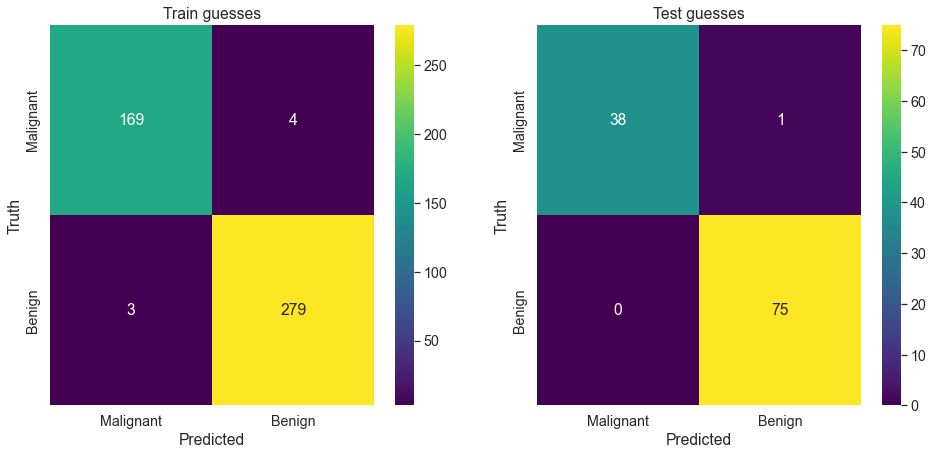

In [80]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,7))
ax1 = plot_confusion_matrix(z_train,logreg.predict(X_train),ax=ax1,title = 'Train guesses')
ax2 = plot_confusion_matrix(z_test,logreg.predict(X_test),ax=ax2, title = 'Test guesses')